# Loading the dataset and primary inspection

In [31]:
import pandas as pd

# Load the dataset from the provided URL
url = 'https://raw.githubusercontent.com/ronydebnath/datasets/main/TeleCom_Data.csv'
df = pd.read_csv(url)

# Displaying the first few rows of the dataset
print(df.head())

# Checking the data types and look for any missing values
print(df.info())

# Summarising statistics of the numerical columns
print(df.describe())


   age          job  marital            education  default housing loan  \
0   40       admin.  married             basic.6y       no      no   no   
1   56     services  married          high.school       no      no  yes   
2   45     services  married             basic.9y  unknown      no   no   
3   59       admin.  married  professional.course       no      no   no   
4   41  blue-collar  married              unknown  unknown      no   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y 

# Handling missing values
#### Checking for missing values

In [32]:

print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Data Exploration and Visualization

In this section, we visualize the distribution of Job types using a bar chart to understand the range and frequency of different job types in the dataset.
Additionally, we calculate the correlation matrix for the dataset and create a heatmap to visualize the correlations between different features.


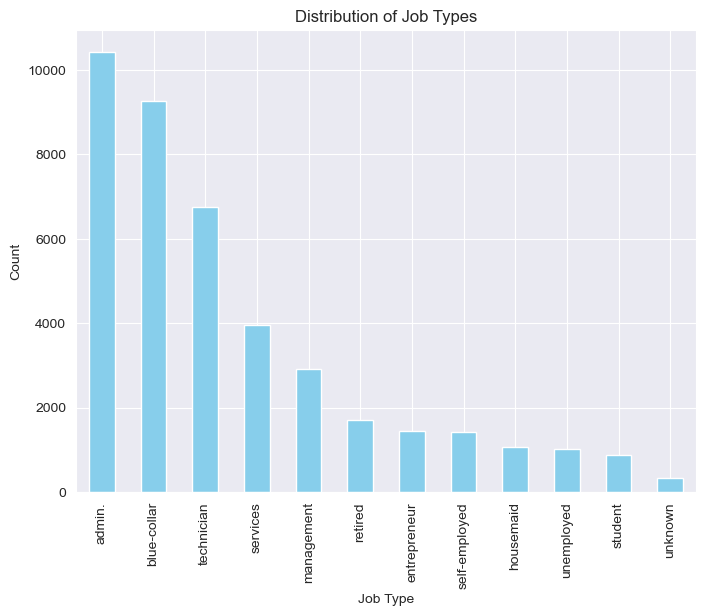

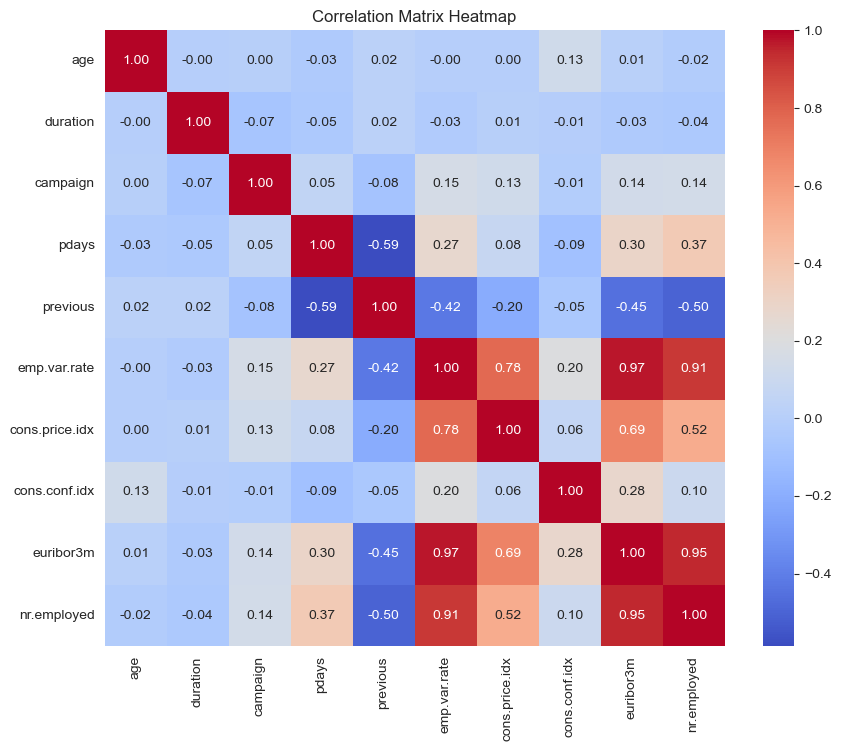

In [33]:
# Data Visualization
import matplotlib.pyplot as plt

# Creating a bar plot of the 'job' categories
plt.figure(figsize=(8, 6))
df['job'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

# Correlation Analysis
import seaborn as sns

# Excluding non-numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_columns.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


### Model Building and Evaluation

In this section, we select the relevant features and the target variable for the model.
We perform one-hot encoding for the categorical variables and split the data into training and testing sets.
Next, we train a logistic regression model, make predictions, and evaluate the model's performance using accuracy, classification report, and confusion matrix.


## Using Parametric Model - GradientBoostingClassifier

In [37]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Selecting features and target variable
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
X = df[features]
y = df['y']

# Preprocessing for categorical data
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE for oversampling the minority class
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Initialising and train the Gradient Boosting classifier
params = {'n_estimators': [100, 150, 200],
          'learning_rate': [0.1, 0.01, 0.001],
          'max_depth': [3, 5, 7],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}
clf = GradientBoostingClassifier(random_state=42)
grid_clf = GridSearchCV(clf, params, cv=3)
grid_clf.fit(X_train_res, y_train_res)

# Making predictions
y_pred = grid_clf.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9072365225837785

Classification Report:
               precision    recall  f1-score   support

          no       0.96      0.94      0.95      7335
         yes       0.57      0.65      0.61       901

    accuracy                           0.91      8236
   macro avg       0.76      0.80      0.78      8236
weighted avg       0.91      0.91      0.91      8236


Confusion Matrix:
 [[6885  450]
 [ 314  587]]


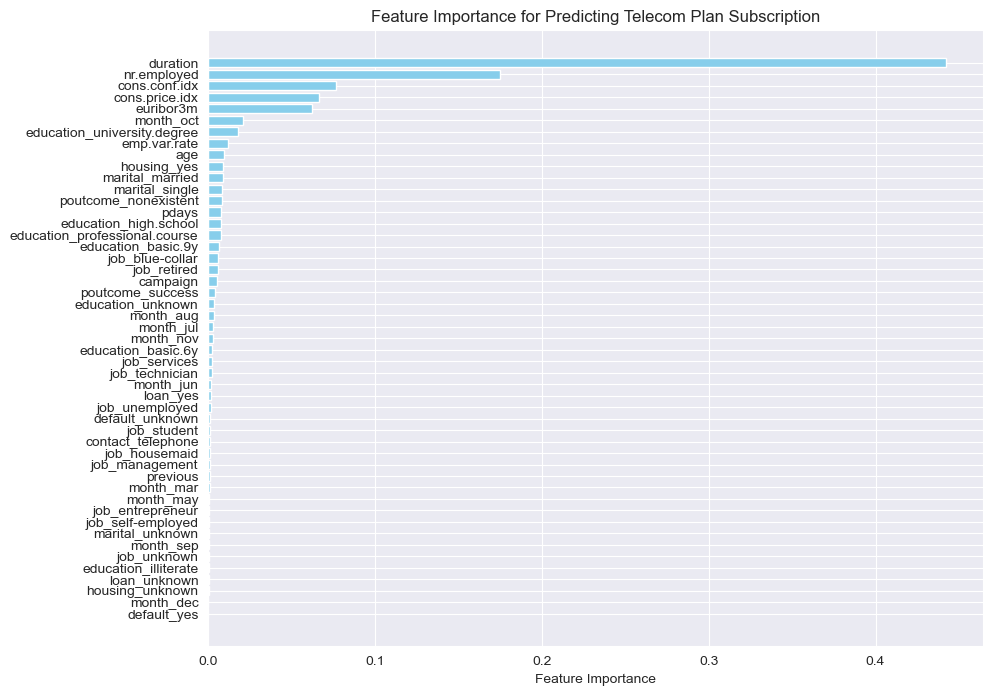

In [40]:
# Fitting the GridSearchCV
grid_clf.fit(X_train_res, y_train_res)

# Getting the best estimator from the GridSearchCV results
best_clf = grid_clf.best_estimator_

# Getting feature importances from the trained model
feature_importance = best_clf.feature_importances_
sorted_idx = feature_importance.argsort()

# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Predicting Telecom Plan Subscription")
plt.show()


# Insights and recommendations
### 1. Duration:
- Customers with longer call durations are more likely to subscribe to the Telecom plan. This implies that engaging customers in more extended conversations or interactions could potentially increase subscription rates.

### 2. Employment Variation Rate (emp.var.rate) and Consumer Confidence Index (cons.conf.idx):
- These economic indicators appear to have a significant impact on subscription rates. Monitoring and understanding fluctuations in these factors could provide insights into customer behavior and aid in tailoring marketing strategies accordingly.

### 3. Consumer Price Index (cons.price.idx) and Euribor 3 Month Rate (euribor3m):
- Changes in consumer price index and interest rates appear to influence customer decision-making. Keeping abreast of these economic indicators and aligning marketing campaigns with favorable trends could enhance subscription rates.

### 4. Month of October (month_oct):
- Customers seem more receptive to marketing campaigns during October. Focusing on targeted promotional activities during this month might yield improved subscription outcomes.

### 5. Education Level (education_university.degree and education_high.school):
- Customers with university degrees and high school education are more likely to subscribe. Tailoring marketing messages to resonate with the educational backgrounds of these segments could lead to more effective communication and improved subscription rates.

### 6. Housing Status (housing_yes):
- Customers who own homes are more likely to subscribe. Understanding the preferences and financial capacities of homeowners could help in designing tailored offerings or promotions.

### 7. Age, Marital Status (marital_married and marital_single):
- Insights into the age and marital status of potential customers can aid in developing targeted marketing strategies. Understanding the needs and preferences of different age groups and marital statuses can help in creating personalized and appealing marketing campaigns.

### 8. Previous Campaign Outcome (poutcome_nonexistent):
- Customers who were not previously contacted during campaigns are more likely to subscribe. Designing new approaches or tailoring strategies to engage potential customers who have not been previously targeted could yield better subscription results.

## Using Non-Parametric Model

In [41]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Selecting features and target variable
X = df[features]
y = df['y']

# Preprocessing for categorical data
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE for oversampling the minority class
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Initialising and train the K-Nearest Neighbors classifier
k = 5  # number of neighbors
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train_res, y_train_res)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.8604905293831957

Classification Report:
               precision    recall  f1-score   support

          no       0.97      0.87      0.92      7335
         yes       0.43      0.78      0.55       901

    accuracy                           0.86      8236
   macro avg       0.70      0.83      0.73      8236
weighted avg       0.91      0.86      0.88      8236


Confusion Matrix:
 [[6384  951]
 [ 198  703]]


/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

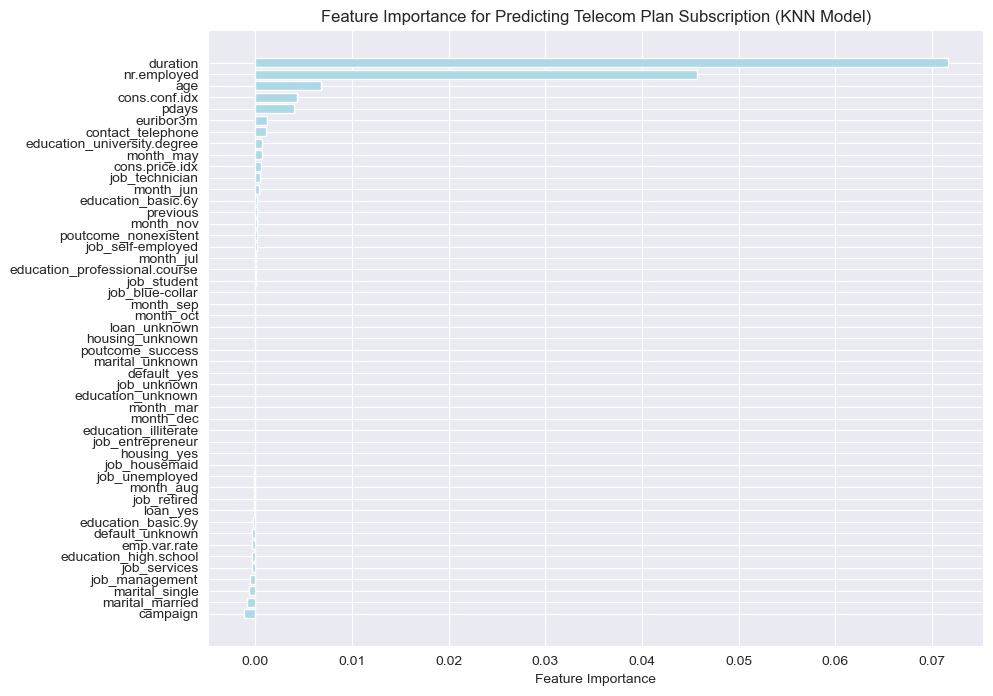

NameError: name 'stats' is not defined

In [ ]:
from scipy import stats
from sklearn.inspection import permutation_importance
import pandas as pd


# Converting the numpy array to a DataFrame
X_df = pd.DataFrame(X)

# Identifying the most important features that contribute to the model's predictions
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

# Visualising the feature importances
import matplotlib.pyplot as plt  # Make sure to import the matplotlib library
plt.figure(figsize=(10, 8))
plt.barh([X.columns[i] for i in sorted_idx], result.importances_mean[sorted_idx], color='lightblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Predicting Telecom Plan Subscription (KNN Model)")
plt.show()

